In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skidl.pyspice import *
print(lib_search_paths)

{'kicad': ['.'], 'skidl': ['.', '/usr/local/lib/python3.6/site-packages/skidl/libs'], 'spice': ['.']}



No errors or warnings found during netlist generation.



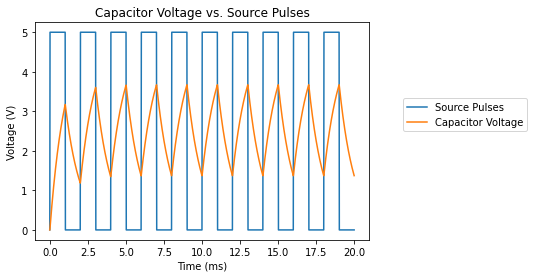

In [2]:
reset()  # Clear out the existing circuitry from the previous example.

# Create a pulsed voltage source, a resistor, and a capacitor.
vs = PULSEV(initial_value=0, pulsed_value=5@u_V, pulse_width=1@u_ms, period=2@u_ms)  # 1ms ON, 1ms OFF pulses.
r = R(value=1@u_kOhm)    # 1 Kohm resistor.
c = C(value=1@u_uF)      # 1 uF capacitor.
r['+', '-'] += vs['p'], c['+']  # Connect the resistor between the positive source terminal and one of the capacitor terminals.
gnd += vs['n'], c['-']   # Connect the negative battery terminal and the other capacitor terminal to ground.

# Simulate the circuit.
circ = generate_netlist()            # Create the PySpice Circuit object from the SKiDL code.
sim = circ.simulator()               # Get a simulator for the Circuit object.
waveforms = sim.transient(step_time=0.01@u_ms, end_time=20@u_ms)  # Run a transient simulation from 0 to 10 msec.

# Get the simulation data.
time = waveforms.time                  # Time values for each point on the waveforms.
pulses = waveforms[node(vs['p'])]      # Voltage on the positive terminal of the pulsed voltage source.
cap_voltage = waveforms[node(c['+'])]  # Voltage on the capacitor.

# Plot the pulsed source and capacitor voltage values versus time.
figure = plt.figure(1)
plt.title('Capacitor Voltage vs. Source Pulses')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.plot(time*1000, pulses)       # Plot pulsed source waveform.
plt.plot(time*1000, cap_voltage)  # Plot capacitor charging waveform.
plt.legend(('Source Pulses', 'Capacitor Voltage'), loc=(1.1, 0.5))
plt.show()

1.0 9999.689416376312 -1.4711245991237871



No errors or warnings found during netlist generation.



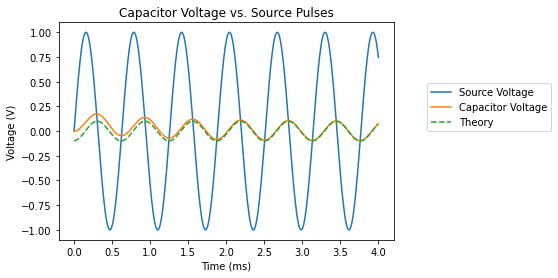

In [3]:
reset()  # Clear out the existing circuitry from the previous example.

frequency = 1591.5
omega = 2.0*np.pi*frequency
amplitude = 1.0
end_time = 4.0
step_time = 0.01

# Create a sinusoidal voltage source, a resistor, and a capacitor.
vs = SINEV(amplitude=amplitude@u_V, frequency=frequency@u_Hz)  # 1V sine wave source at 100 Hz.

r = R(value=1@u_kOhm)    # 1 Kohm resistor.
c = C(value=1@u_uF)      # 1 uF capacitor.
r['+', '-'] += vs['p'], c['+']  # Connect the resistor between the positive source terminal and one of the capacitor terminals.
gnd += vs['n'], c['-']   # Connect the negative battery terminal and the other capacitor terminal to ground.

# Simulate the circuit.
circ = generate_netlist()            # Create the PySpice Circuit object from the SKiDL code.
sim = circ.simulator()               # Get a simulator for the Circuit object.
waveforms = sim.transient(step_time=step_time@u_ms, end_time=end_time@u_ms)  # Run a transient simulation from 0 to 10 msec.

# Get the simulation data.
time = waveforms.time                  # Time values for each point on the waveforms.
pulses = waveforms[node(vs['p'])]      # Voltage on the positive terminal of the pulsed voltage source.
cap_voltage = waveforms[node(c['+'])]  # Voltage on the capacitor.

# Theory
argument = float(-1.0*omega*r.value*c.value)
phase = np.arctan(argument)
tt = np.arange(0.0,end_time/1000.0,step_time/1000.0)
camplitude = amplitude/np.sqrt(1.0+(omega*r.value*c.value)**2)
cap_voltage_theory = camplitude*np.sin(omega*tt+phase)
print (amplitude,omega,phase)

# Plot the pulsed source and capacitor voltage values versus time.
figure = plt.figure(1)
plt.title('Capacitor Voltage vs. Source Pulses')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.plot(time*1000, pulses)       # Plot pulsed source waveform.
plt.plot(time*1000, cap_voltage)  # Plot capacitor charging waveform.
plt.plot(tt*1000,cap_voltage_theory,'--')
plt.legend(('Source Voltage', 'Capacitor Voltage','Theory'), loc=(1.1, 0.5))
plt.show()